# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Frameworks</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## Segmentação Semântica de Objetos com GluonCV 

![title](dados/imagens/types.png)

Nosso objetivo nesta tarefa é implementar um segmentador de objetos em imagens usando uma rede pré-treinada do GluonCV.

**O que é segmentação semântica?**

A segmentação semântica é um passo natural na progressão da inferência em modelos de Visão Computacional:

- A tarefa inicial é a classificação, que consiste em fazer uma previsão para toda uma entrada.
- O próximo passo é a localização / detecção, que fornece não apenas as classes, mas também informações adicionais sobre a localização espacial dessas classes.
- Por fim, a segmentação semântica obtém inferência refinada, fazendo previsões densas inferindo rótulos para cada pixel, para que cada pixel seja rotulado com a classe da sua região.

Usaremos a técnica de Fully Convolutional Networks (FCN) for Semantic Segmentation.

As redes convolucionais são modelos visuais poderosos que geram hierarquias de recursos. As redes convolucionais por si mesmas, treinadas de ponta a ponta, pixel a pixel, excedem o estado da arte na segmentação semântica. 

- Nosso objetivo principal é construir redes "totalmente convolucionais".


- Adaptamos redes de classificação modernas (AlexNet, a Rede VGG e GoogLeNet) em redes totalmente convolucionais e transferimos suas representações aprendidas, ajustando a tarefa de segmentação.


- Em seguida, definimos uma arquitetura que combina informações semânticas de uma camada profunda e densa com informações de aparência de uma camada fina e menos densa para produzir segmentações precisas e detalhadas.

![title](dados/imagens/seg.jpeg)

Paper da técnica: https://arxiv.org/abs/1411.4038

E tudo isso pode ser feito com uma linha de código, usando um modelo pré-treinado oferecido pelo GluonCV.

GluonCV: https://gluon-cv.mxnet.io/

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Instala o MxNet
!pip install -q mxnet gluoncv

In [4]:
# Imports
import mxnet as mx
import gluoncv as gcv
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

matplotlib 3.2.1
mxnet      1.6.0
gluoncv    0.7.0
Data Science Academy


In [6]:
# Carrega a imagem que queremos segmentar objetos
image = mx.image.imread('dados/imagens/elephant.jpg')
copy_image = image.asnumpy().copy()

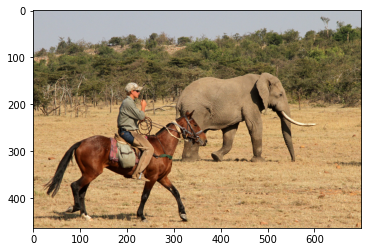

In [7]:
# Visualizar a imagem
plt.imshow(image.asnumpy())

In [8]:
# Transformamos a imagem para o formato esperado pelo modelo FCN
from mxnet.gluon.data.vision import transforms

transform_fn = transforms.Compose([transforms.ToTensor(), transforms.Normalize([.485,.456,.406], [.229,.224,.225])])

In [9]:
# Aplicamos a transformação à imagem
image = transform_fn(image)

In [10]:
# Shape
image.shape

(3, 464, 700)

In [11]:
# Imagem transformada
image


[[[ 1.0673003   1.0330508   0.9988013  ...  1.0330508   0.9988013
    0.96455175]
  [ 1.015926    1.015926    1.015926   ...  0.9988013   0.9816765
    0.9816765 ]
  [ 0.9816765   0.9988013   0.9988013  ...  1.0501755   1.0673003
    1.0330508 ]
  ...
  [ 1.2556726   1.221423    1.4611696  ...  1.7522904   1.6837914
    1.5810429 ]
  [ 1.3412963   1.6495419   1.4097953  ...  1.6324171   1.4954191
    1.42692   ]
  [ 1.5467933   1.4954191   1.4440448  ...  1.1357993   1.0673003
    0.96455175]]

 [[ 1.2731093   1.2380953   1.2030813  ...  1.2731093   1.2731093
    1.2731093 ]
  [ 1.2556022   1.2556022   1.2556022  ...  1.2906163   1.2906163
    1.2906163 ]
  [ 1.2906163   1.2731093   1.2731093  ...  1.2906163   1.2906163
    1.2556022 ]
  ...
  [ 0.3102242   0.48529422  0.90546227 ...  1.1330533   1.0630252
    0.78291327]
  [ 0.6078432   1.1330533   0.9229692  ...  1.2205883   1.0980393
    0.9754903 ]
  [ 1.1855743   1.0105042   0.87044823 ...  0.8529412   0.6778712
    0.6078432 ]]


In [12]:
# Expande as dimensões
image = image.expand_dims(0)

In [13]:
# Shape
image.shape

(1, 3, 464, 700)

In [14]:
# Imagem com dimensões expandidas
image


[[[[ 1.0673003   1.0330508   0.9988013  ...  1.0330508   0.9988013
     0.96455175]
   [ 1.015926    1.015926    1.015926   ...  0.9988013   0.9816765
     0.9816765 ]
   [ 0.9816765   0.9988013   0.9988013  ...  1.0501755   1.0673003
     1.0330508 ]
   ...
   [ 1.2556726   1.221423    1.4611696  ...  1.7522904   1.6837914
     1.5810429 ]
   [ 1.3412963   1.6495419   1.4097953  ...  1.6324171   1.4954191
     1.42692   ]
   [ 1.5467933   1.4954191   1.4440448  ...  1.1357993   1.0673003
     0.96455175]]

  [[ 1.2731093   1.2380953   1.2030813  ...  1.2731093   1.2731093
     1.2731093 ]
   [ 1.2556022   1.2556022   1.2556022  ...  1.2906163   1.2906163
     1.2906163 ]
   [ 1.2906163   1.2731093   1.2731093  ...  1.2906163   1.2906163
     1.2556022 ]
   ...
   [ 0.3102242   0.48529422  0.90546227 ...  1.1330533   1.0630252
     0.78291327]
   [ 0.6078432   1.1330533   0.9229692  ...  1.2205883   1.0980393
     0.9754903 ]
   [ 1.1855743   1.0105042   0.87044823 ...  0.8529412   0.

In [15]:
# Download do modelo pré-treinado
# https://gluon-cv.mxnet.io/model_zoo/segmentation.html#ade20k-dataset
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained = True)

In [16]:
# Previsões com o modelo
output = network.predict(image)

In [17]:
# Shape das previsões
output.shape

(1, 150, 464, 700)

In [18]:
# Extraímos a primeira dimensão...
output = output[0]

In [19]:
# ...e aplicamos a função softmax para extrair as probabilidades
output_prob = mx.nd.softmax(output, axis = 0)

In [20]:
# E então obtemos as previsões com valores mais altos usando mx.nd.argmax()
prediction = mx.nd.argmax(output, 0).asnumpy()

In [21]:
# Precisamos de uma paleta de cores para a imagem segmentada
from gluoncv.utils.viz import get_color_pallete
prediction_image = get_color_pallete(prediction, 'ade20k')

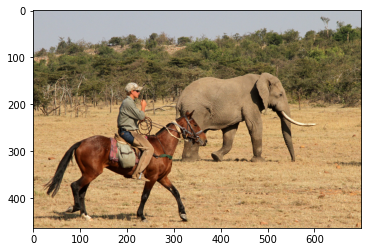

In [22]:
# Imagem original
plt.imshow(copy_image)

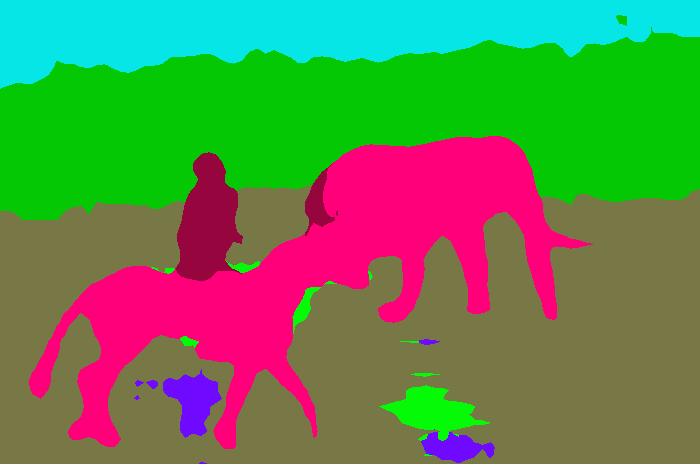

In [23]:
# Imagem segmentada
prediction_image

# Fim